# L3: Image generation app 🎨

Load your HF API key and relevant Python libraries

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [2]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.


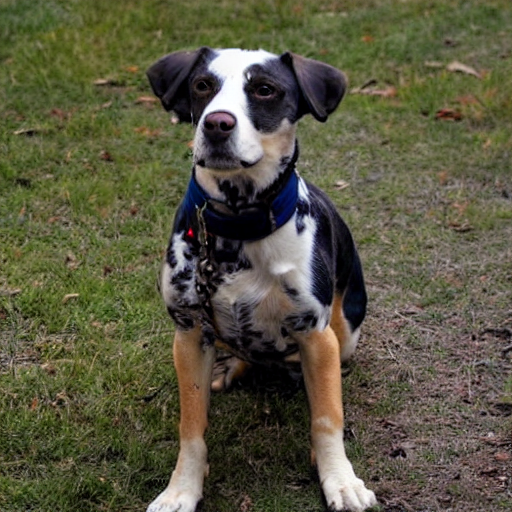

In [3]:
prompt = "a dog in a park"

result = get_completion(prompt)
IPython.display.HTML(f'<img src="data:image/png;base64,{result}" />')

## Generating with `gr.Interface()`

In [4]:
import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt):
    output = get_completion(prompt)
    result_image = base64_to_pil(output)
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch(share=True, server_port=int(os.environ['PORT1']))

Running on local URL:  https://0.0.0.0:19062

Could not create share link. Missing file: /usr/local/lib/python3.9/site-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.9/site-packages/gradio


In [5]:
demo.close()

Closing server running on port: 19062


## Building a more advanced interface

In [6]:
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image

#### gr.Slider()
- You can set the `minimum`, `maximum`, and starting `value` for a `gr.Slider()`.
- If you want the slider to increment by integer values, you can set `step=1`.

In [7]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

Closing server running on port: 19062
Running on local URL:  https://0.0.0.0:11797

Could not create share link. Missing file: /usr/local/lib/python3.9/site-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.9/site-packages/gradio


In [8]:
demo.close()

Closing server running on port: 11797


## `gr.Blocks()`

- Within `gr.Blocks()`, you can define multiple `gr.Row()`s, or multiple `gr.Column()`s.
- Note that if the jupyter notebook is very narrow, the layout may change to better display the objects.  If you define two columns but don't see the two columns in the app, try expanding the width of your web browser, and the screen containing this jupyter notebook.

- When using `gr.Blocks()`, you'll need to explicitly define the "Submit" button using `gr.Button()`, whereas the 'Clear' and 'Submit' buttons are automatically added when using `gr.Interface()`.

In [9]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 19062
Closing server running on port: 11797
Running on local URL:  https://0.0.0.0:25845

Could not create share link. Missing file: /usr/local/lib/python3.9/site-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.9/site-packages/gradio


In [10]:
demo.close()

Closing server running on port: 25845


#### scale

- To choose how much relative width to give to each column, set the `scale` parameter of each `gr.Column()`.  
- If one column has `scale=4` and the second column has `scale=1`, then the first column takes up 4/5 of the total width, and the second column takes up 1/5 of the total width.

#### gr.Accordion()
- The `gr.Accordion()` can show/hide  the app options with a mouse click.
- Set `open=True` to show the contents of the Accordion by default, or `False` to hide it by default.

In [11]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT4']))

Closing server running on port: 19062
Closing server running on port: 11797
Running on local URL:  https://0.0.0.0:34053

Could not create share link. Missing file: /usr/local/lib/python3.9/site-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.9/site-packages/gradio


In [12]:
gr.close_all()

Closing server running on port: 19062
Closing server running on port: 11797
